In [1]:
def read_file(filename):
    with open(filename, "r") as file:
        content = file.read()
    return content.split("\n\n") 

sample_data = read_file("sample_data.txt")

In [2]:
sample_data

['An atlas of small non-coding RNAs in Human Preimplantation Development (Mouse embryo RNA-seq)\nOur current understanding of the molecular circuitries that govern early embryogenesis remains limited, particularly in the human. Small non-coding RNAs (sncRNAs) regulate gene expression transcriptionally and post-transcriptionally, however, the expression of specific biotypes and their dynamics during preimplantation development remains to be determined. Using Small-seq, we identified the abundance of and dynamic expression of piRNA, rRNA, snoRNA, tRNA, and miRNA in human embryos from day 3 to 7. Among the biotypes, both miRNA and snoRNA displayed distinct associations with developmental time and lineage formation, many of which were  found to target key gene expression programs in pluripotency and lineage establishment. We observed an enrichment of the chromosome 19 miRNA cluster (C19MC) in the trophectoderm (TE), and the chromosome 14 miRNA cluster (C14MC) and MEG8-related snoRNAs in th

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster._kmeans import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD 

In [78]:
vectorizer = TfidfVectorizer()
vectorizer.fit(sample_data)
data_matrix = vectorizer.transform(sample_data)

In [76]:
vectorizer.get_feature_names_out()

array(['000', '001', '019597', ..., 'î²', 'îºb', 'î¼m'], dtype=object)

In [79]:
vectorizer.vocabulary_

{'an': 443,
 'atlas': 556,
 'of': 2923,
 'small': 3809,
 'non': 2865,
 'coding': 915,
 'rnas': 3601,
 'in': 2142,
 'human': 2036,
 'preimplantation': 3235,
 'development': 1258,
 'mouse': 2731,
 'embryo': 1479,
 'rna': 3596,
 'seq': 3705,
 'our': 2973,
 'current': 1106,
 'understanding': 4241,
 'the': 4088,
 'molecular': 2707,
 'circuitries': 875,
 'that': 4086,
 'govern': 1886,
 'early': 1435,
 'embryogenesis': 1480,
 'remains': 3490,
 'limited': 2429,
 'particularly': 3039,
 'sncrnas': 3817,
 'regulate': 3462,
 'gene': 1830,
 'expression': 1657,
 'transcriptionally': 4156,
 'and': 453,
 'post': 3205,
 'however': 2025,
 'specific': 3844,
 'biotypes': 669,
 'their': 4089,
 'dynamics': 1415,
 'during': 1410,
 'to': 4127,
 'be': 613,
 'determined': 1251,
 'using': 4282,
 'we': 4360,
 'identified': 2078,
 'abundance': 291,
 'dynamic': 1413,
 'pirna': 3139,
 'rrna': 3623,
 'snorna': 3820,
 'trna': 4195,
 'mirna': 2680,
 'embryos': 1482,
 'from': 1801,
 'day': 1151,
 'among': 436,
 'both': 

In [66]:
k_means = KMeans(n_clusters=4,random_state=42)
k_means.fit_predict(data_matrix)

/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2,
       0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 3, 3, 3, 3, 3, 0, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 3, 0, 3, 1,
       1, 0, 1, 3, 2, 0, 0, 0, 1, 1, 2, 0, 0, 3, 3, 3, 0, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1], dtype=int32)

In [80]:
bk_means = BisectingKMeans(n_clusters=4,random_state=42,bisecting_strategy='largest_cluster')
bk_means.fit_predict(data_matrix)

array([2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 0, 3, 2, 2, 1, 1, 1, 2, 1, 3,
       0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 3, 3, 3, 2,
       1, 2, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2], dtype=int32)

In [59]:
#Very bad for this cause we can't know the scores between object we might get, so we can't make good predictions
dbscan = DBSCAN(eps=0.75,min_samples=5,metric='cosine')
dbscan_labels = dbscan.fit_predict(data_matrix)

In [15]:
k_means.labels_

array([2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [81]:
svd = TruncatedSVD(n_components=3)
svd_data = svd.fit_transform(data_matrix)

In [82]:
svd_data

array([[ 4.76327924e-01, -1.85797405e-01, -4.51896640e-02],
       [ 2.31768530e-01, -6.74697176e-02, -8.64155649e-02],
       [ 2.71151251e-01, -3.57376693e-02, -6.29914206e-02],
       [ 2.49050743e-01, -8.22865866e-02, -4.79118582e-02],
       [ 3.68238444e-01, -1.36469566e-01,  1.25378002e-02],
       [ 3.72725585e-01, -9.75561380e-02,  1.68769894e-02],
       [ 3.71442980e-01,  5.14493072e-01, -5.75373413e-02],
       [ 4.67146193e-01, -1.83997348e-01, -5.04982963e-02],
       [ 4.72169564e-01, -1.86772119e-01, -4.74044565e-02],
       [ 3.77387750e-01, -1.34919604e-01, -8.48095977e-02],
       [ 4.36202579e-01, -1.44128980e-01, -6.25269924e-02],
       [ 4.24453435e-01, -4.77888150e-02,  6.85247708e-01],
       [ 2.15304013e-01, -2.87666561e-02, -3.50577484e-02],
       [ 4.24453435e-01, -4.77888150e-02,  6.85247708e-01],
       [ 3.38976192e-01, -9.76785752e-02,  6.35252095e-03],
       [ 2.91280373e-01, -9.50756085e-02, -5.60668781e-02],
       [ 2.54173649e-01, -9.23740523e-02

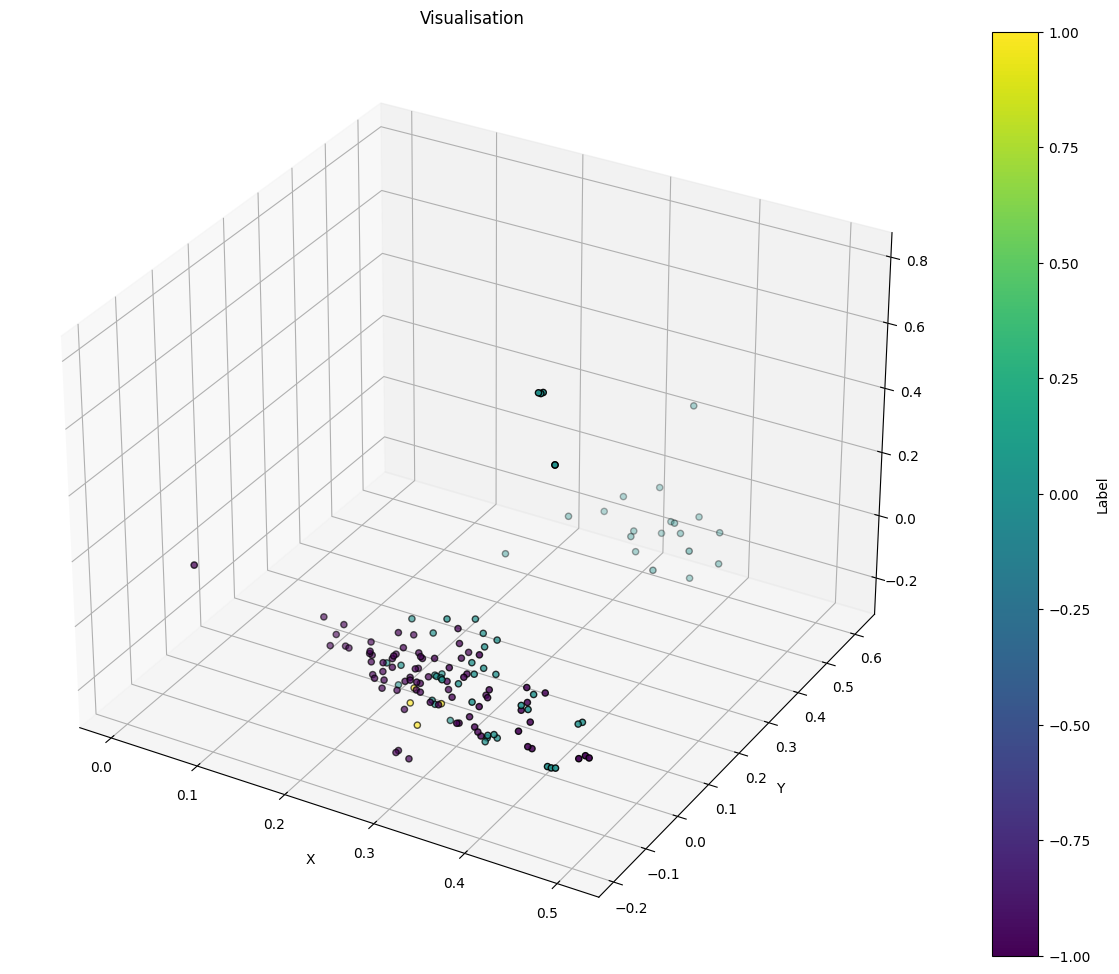

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = svd_data[:,0]
y = svd_data[:,1]
z = svd_data[:,2]
labels = dbscan_labels

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection="3d")


sc = ax.scatter(x, y, z, c=labels, cmap="viridis", edgecolors="k")


plt.colorbar(sc,label="Label")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualisation")
plt.show()


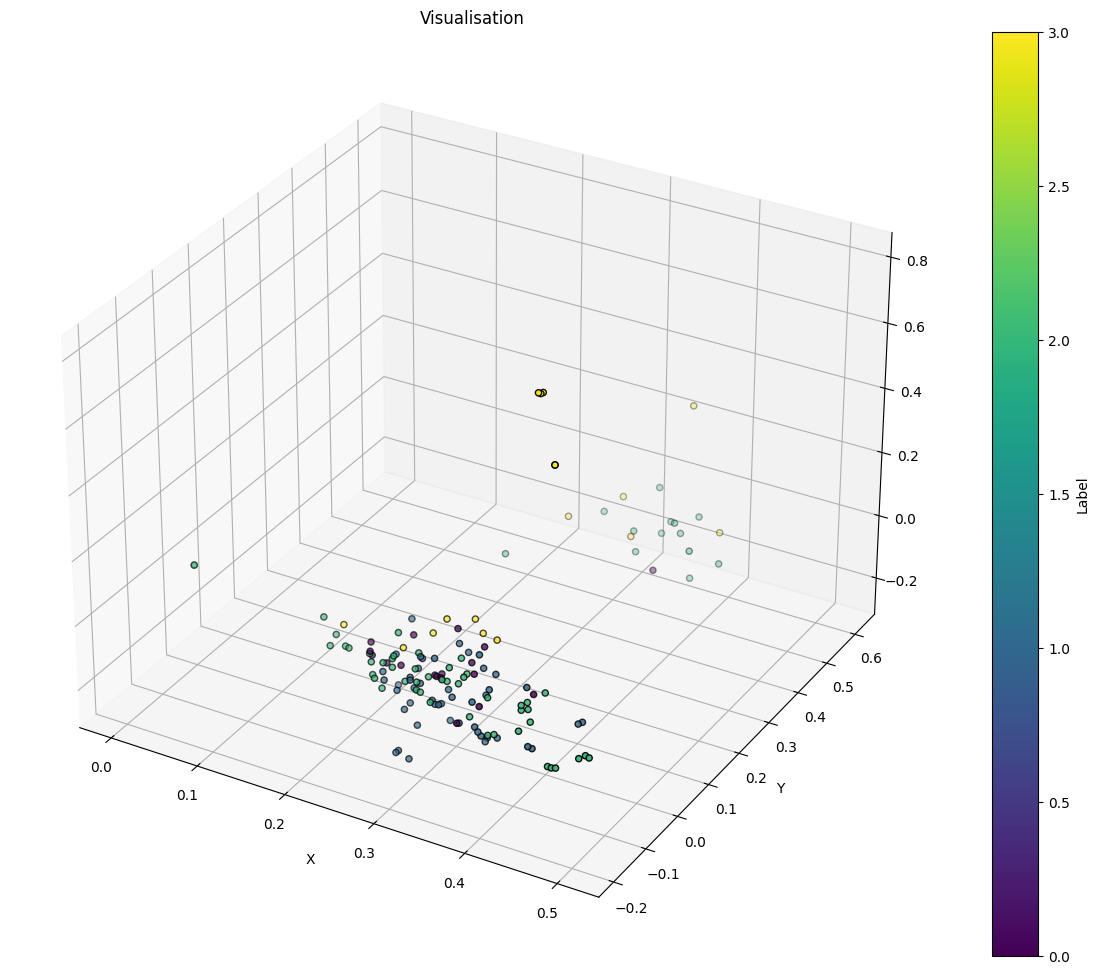

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = svd_data[:,0]
y = svd_data[:,1]
z = svd_data[:,2]
labels = bk_means.labels_

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection="3d")


sc = ax.scatter(x, y, z, c=labels, cmap="viridis", edgecolors="k")


plt.colorbar(sc,label="Label")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualisation")
plt.show()
